###   逻辑回归

### 1.1 数据可视化

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# 当names没被赋值时，header会变成0，即选取数据文件的第一行作为列名
# 当 names被赋值，header没被赋值时，那么header会变成None。如果都赋值，就会实现两个参数的组合功能
data = pd.read_csv('./datasets/ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


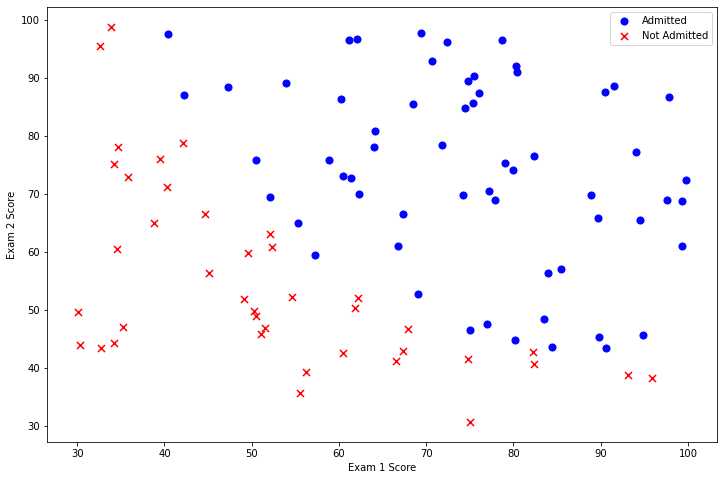

In [13]:
# .isin([]) 精准查找数据
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]


# fig代表绘图窗口(Figure)；ax代表这个绘图窗口上的坐标系(axis)
# figsize=(12, 8)绘制窗口尺寸
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

### 1.2 实现

### 1.2.1 sigmoid函数

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### 1.2.2 代价函数和梯度

In [15]:
# 实现代价函数
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    return np.sum(first - second) / (len(X))

In [27]:
# 加一列常数列
data.insert(0, 'Ones', 1)

In [32]:
# 初始化X，y,θ 
cols = data.shape[1]
X = data.iloc[:,:cols-1]
y = data.iloc[:,cols-1:cols]

theta = np.zeros(3)

# 转换X，y的类型
X = np.array(X.values)
y = np.array(y.values)

In [33]:
# 检查矩阵的维度
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [34]:
# 用初始θ计算代价
cost(theta, X, y)

0.6931471805599453

In [38]:
# 实现梯度下降的函数（并没有更新θ）
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
#   ravel()对其进行降维，行序优先
    parameters = int(theta.ravel().shape[1])
    print(parameters)
    
    grad = np.zeros(parameters)
    print(grad)
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad    

In [39]:
gradient(theta, X, y)

3
[0. 0. 0.]


array([ -0.1       , -12.00921659, -11.26284221])

In [41]:
import scipy.optimize as opt
# 调用函数执行梯度下降
'''
func：优化的目标函数

x0：初值

fprime：提供优化函数func的梯度函数，不然优化函数func必须返回函数值和梯度，或者设置approx_grad=True

approx_grad :如果设置为True，会给出近似梯度

args：元组，是传递给优化函数的参数
'''
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X,y))
'''
x ： 数组，返回的优化问题目标值

'''
result

3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]
3
[0. 0. 0.]


(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [42]:
# 用θ的计算结果代回代价函数计算
cost(result[0], X, y)

0.20349770158947425

### 1.2.3 找出决策边界

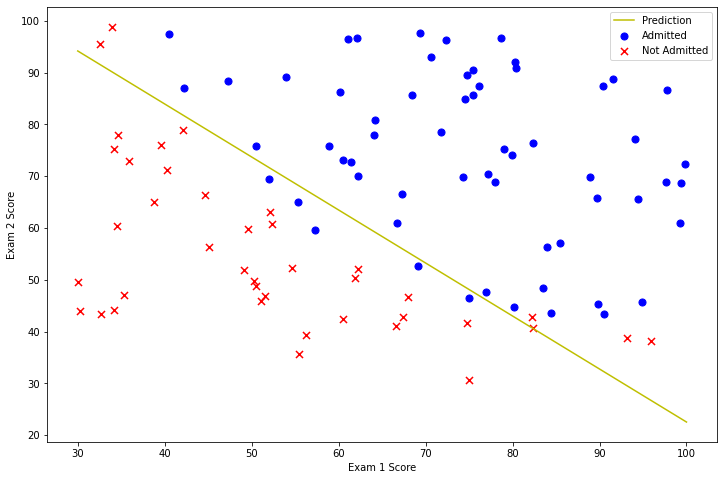

In [43]:
# 即当sigmoid函数为0.5时，即z为0时，即θ+ θ* x1 + θ*x2 = 0时。 图像的横纵坐标为x1和x2
# 生成等间隔数列，第一、二参数为数列的开头和结尾，第三个参数为数列的元素个数
plotting_x1 = np.linspace(30, 100, 100)
plotting_x2 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1, plotting_x2, 'y', label='Prediction')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

### 评价逻辑回归模型

In [54]:
# 确定参数后，通过此模型来预测学生是否被录取
def hfunc1(theta, X):
    print(theta.shape)
    return sigmoid(np.dot(theta.T, X))

hfunc1(result[0], [1, 45, 85])


(3,)


0.776290625526598

In [49]:
# 评判模型在训练集上的准确率
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [56]:
# 统计预测正确率
# theta_min.shape (1, 3)
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%
